# Analisi esplorativa dei dati EARS: Un'indagine sui pattern di resistenza batterica in Europa

In [2]:
import pandas as pd

data = pd.read_csv('ecdc.csv')


# Shape: restituisce le dimensioni del DataFrame (righe, colonne)
print("Shape:", data.shape)

# Colonne: restituisce i nomi delle colonne del DataFrame
print("Colonne:", data.columns)

# Info: fornisce un riepilogo delle informazioni sul DataFrame, incluso il tipo di dati per ciascuna colonna
print("Info:")
print(data.info())

# Calcolare il numero di valori nulli in ogni colonna
valori_nulli = data.isnull().sum()

# Stampa il risultato per ogni colonna
print("Numero di valori nulli per ogni colonna:")
print(valori_nulli) 

Shape: (64386, 10)
Colonne: Index(['Unnamed: 0', 'Distribution', 'Unit', 'Time', 'RegionCode',
       'RegionName', 'Category', 'Value', 'Bacteria', 'Antibiotic'],
      dtype='object')
Describe:
         Unnamed: 0          Time         Value
count  64386.000000  64386.000000  64386.000000
mean   32192.500000   2011.023949     17.850871
std    18586.781553      4.704133     23.939143
min        0.000000   2000.000000      0.000000
25%    16096.250000   2007.000000      0.000000
50%    32192.500000   2011.000000      7.692308
75%    48288.750000   2015.000000     25.000000
max    64385.000000   2018.000000    100.000000
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64386 entries, 0 to 64385
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    64386 non-null  int64  
 1   Distribution  64386 non-null  object 
 2   Unit          64386 non-null  object 
 3   Time          64386 non-null  int64  

In [22]:
data.head(5)

,Distribution,Unit,Time,RegionCode,RegionName,Category,Value,Bacteria,Antibiotic
0,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,0-4,0.000000,Acinetobacter spp.,Aminoglycosides
1,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,5-18,100.000000,Acinetobacter spp.,Aminoglycosides
2,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,19-64,62.857143,Acinetobacter spp.,Aminoglycosides
3,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,65+,56.521739,Acinetobacter spp.,Aminoglycosides
4,"R - resistant isolates proportion, by age",%,2012-01-01,CY,Cyprus,0-4,33.333333,Acinetobacter spp.,Aminoglycosides


# Data Collection

Dataset scaricato dal database EARS. Ogni voce proviene da un'istituzione di segnalazione nel rispettivo paese europeo. I dati sono stati puliti per creare colonne separate per i batteri e il gruppo di antibiotici. Sono stati rimossi i dati ridondanti o inaffidabili, e sono state apportate altre modifiche per rendere i dati ben formattati e più leggibili.

"Distribution" si riferisce a se i dati sono stati segnalati per un particolare genere o gruppo di età; "RegionName" si riferisce al paese dell'istituzione di segnalazione; "Time" è l'anno; "Category" si riferisce al gruppo di età o al genere (a seconda della distribuzione); "Value" si riferisce alla percentuale di batteri che erano resistenti al gruppo di antibiotici; "Bacteria" si riferisce ai batteri in cui è stata monitorata la resistenza; "Antibiotic" si riferisce al gruppo di antibiotici che è stato utilizzato per uccidere i batteri.

### DESCRIZIONE DELLE COLONNE 

Unnamed: 0: sembra essere un indice aggiunto durante la creazione o il salvataggio del dataframe. Potrebbe non avere un significato utile per l'analisi e potrebbe essere rimosso.

Distribution: si riferisce a se i dati sono stati segnalati per un particolare genere o gruppo di età.

Unit: modalità in percentuale 

Time: questa colonna rappresenta l'anno, che varia da 2000 a 2018.

RegionCode, RegionName: queste colonne rappresentano codici e nomi di regioni.

Category: si riferisce al gruppo di età o al genere (a seconda della distribuzione).

Value: si riferisce alla percentuale di batteri che erano resistenti al gruppo di antibiotici.

Bacteria: rappresenta i batteri in cui è stata monitorata la resistenza.

Antibiotic: si riferisce al gruppo di antibiotici che è stato utilizzato per uccidere i batteri.

### Data Cleaning

Dalla descrizione dei dati forniti, sembra che il DataFrame abbia 64386 righe e 10 colonne. Ogni colonna è indicata dall'indice seguente: ['Unnamed: 0', 'Distribution', 'Unit', 'Time', 'RegionCode', 'RegionName', 'Category', 'Value', 'Bacteria', 'Antibiotic'].

Per quanto riguarda la pulizia dei dati, sembra che non ci siano valori nulli nelle colonne, come indicato dalla riga "Numero di valori nulli per ogni colonna". Tuttavia, ci sono alcune azioni che potresti prendere in considerazione per la pulizia e la preparazione dei dati:

1) Rimozione delle colonne non necessarie: Se la colonna "Unnamed: 0" non fornisce alcuna informazione rilevante, potresti eliminarla dal DataFrame utilizzando il metodo drop di pandas.
2) Gestione dei tipi di dati: Assicurati che i tipi di dati delle colonne siano corretti. Ad esempio, se la colonna "Time" rappresenta l'anno, potresti convertirla in un tipo di dato datetime per una gestione più agevole.
3) Gestione dei valori anomali: Verifica se ci sono valori anomali o outliers nella colonna "Value" e decide come gestirli. Ad esempio, potresti sostituire i valori anomali con NaN o con un valore appropriato, a seconda del contesto.


In [21]:
# Create a copy of the original DataFrame
cleaned_data = data.copy()

#Togliere le colonne non necessarie come "Unnamed:0"
#data = data.drop('Unnamed: 0', axis=1)

#Convertire in datetime colonna "Time"
data['Time'] = pd.to_datetime(data['Time'], format='%Y')

# Outliers
data['Value'] = np.where((data['Value'] < 0) | (data['Value'] > 100), np.nan, data['Value'])

# Calcolare il numero di valori nulli in ogni colonna
valori_nulli = data.isnull().sum()

In [18]:
data.head()

,Distribution,Unit,Time,RegionCode,RegionName,Category,Value,Bacteria,Antibiotic
0,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,0-4,0.000000,Acinetobacter spp.,Aminoglycosides
1,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,5-18,100.000000,Acinetobacter spp.,Aminoglycosides
2,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,19-64,62.857143,Acinetobacter spp.,Aminoglycosides
3,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,65+,56.521739,Acinetobacter spp.,Aminoglycosides
4,"R - resistant isolates proportion, by age",%,2012-01-01,CY,Cyprus,0-4,33.333333,Acinetobacter spp.,Aminoglycosides


## Data Exploration: analisi preliminare dei dati. 

### Quali sono i batteri e gli antibiotici considerati?

In [6]:
# Ottieni i valori univoci per 'Bacteria'
unique_bacteria = data['Bacteria'].unique()
print("Batteri unici:")
print(unique_bacteria)

# Ottieni i valori univoci per 'Antibiotic'
unique_antibiotics = data['Antibiotic'].unique()
print("Antibiotici unici:")
print(unique_antibiotics)



Batteri unici:
['Acinetobacter spp.' 'Enterococcus faecalis' 'Enterococcus faecium'
 'Escherichia coli' 'Klebsiella pneumoniae' 'Pseudomonas aeruginosa'
 'Staphylococcus aureus' 'Streptococcus pneumoniae']
Antibiotici unici:
['Aminoglycosides' 'Carbapenems'
 'Combined resistance (fluoroquinolones, aminoglycosides and carbapenems)'
 'Fluoroquinolones' 'Aminopenicillins' 'High-level gentamicin'
 'Vancomycin'
 'Combined resistance (third-generation cephalosporin, fluoroquinolones and aminoglycoside)'
 'Third-generation cephalosporins' 'Ceftazidime'
 'Combined resistance (at least three of piperac. and tazob., fluoroq., ceftaz., aminogl. and carbapenems)'
 'PiperacillinTazobactam' 'Meticillin (MRSA)' 'Macrolides' 'Penicillins']


### Quale antibiotico è stato usato per ogni batterio? E' da considerarsi efficiente? 

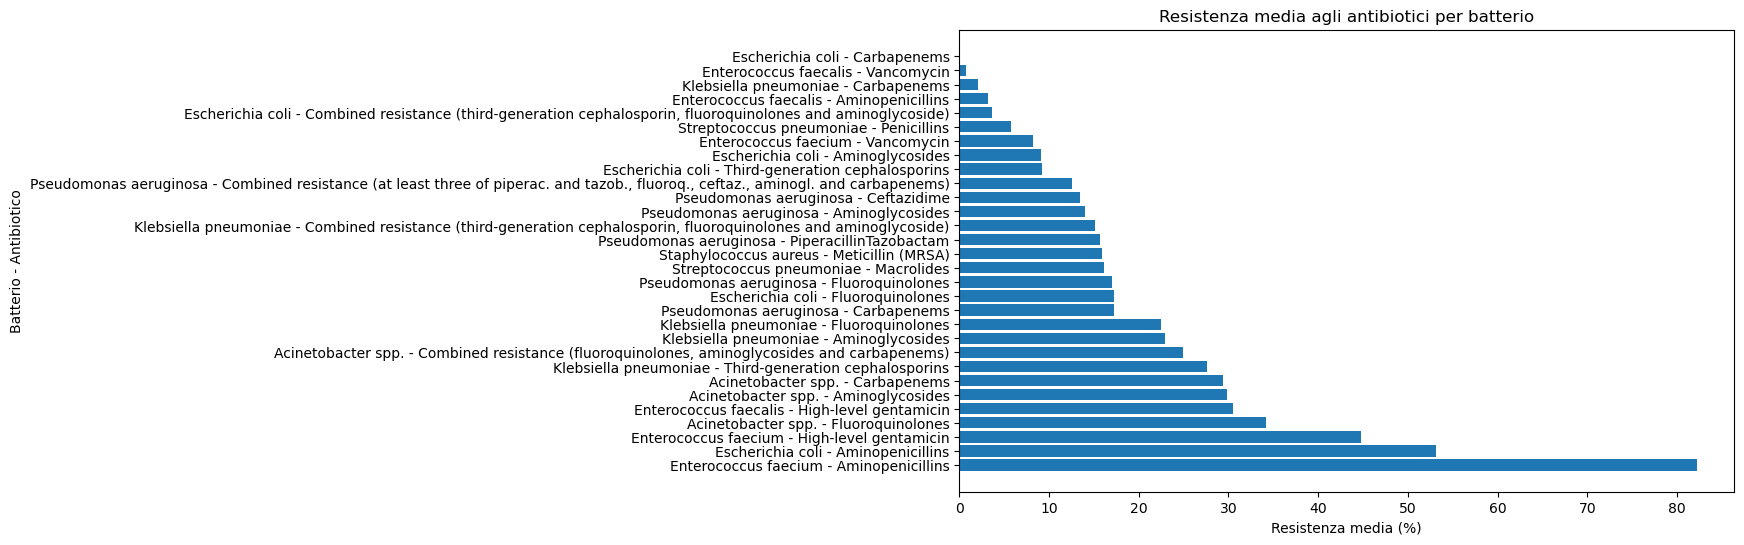

In [13]:
# Raggruppa per 'Bacteria' e 'Antibiotic' e calcola la media di 'Value'
grouped = data.groupby(['Bacteria', 'Antibiotic'])['Value'].mean().reset_index()

# Ordina i risultati in ordine decrescente di 'Value'
grouped = grouped.sort_values('Value', ascending=False)

# Visualizza i risultati con un grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(grouped['Bacteria'] + ' - ' + grouped['Antibiotic'], grouped['Value'])
plt.xlabel('Resistenza media (%)')
plt.ylabel('Batterio - Antibiotico')
plt.title('Resistenza media agli antibiotici per batterio')
plt.show()


In questo codice, barh crea un grafico a barre orizzontale, con l'asse y rappresentante le combinazioni di batterio e antibiotico, e l'asse x rappresentante la resistenza media. Il metodo invert_yaxis() è utilizzato per invertire l'ordine dell'asse y, in modo che le combinazioni con la resistenza media più alta siano in cima.

### ORDINAMENTO IN BASE ALL'EFFICIENZA DELL'ANTIBIOTICO 

La resistenza agli antibiotici è rappresentata dalla percentuale di ceppi resistenti, quindi l'efficienza potrebbe essere interpretata come l'inverso di questa resistenza (ossia, 1/Resistenza). In questo modo è ancora più evidente quali siano le coppie di batteri-antibiotico più preoccupanti (anche detti superbugs) e quali invece al momento possono essere trattati con l'antibiotico corrispondente. 



Attenzione: Nel calcolo dell'inverso, dobbiamo stare attenti a non dividere per zero, perciò trasformeremo tutte le resistenze del 0% in un valore molto piccolo prima di calcolare l'inverso. 

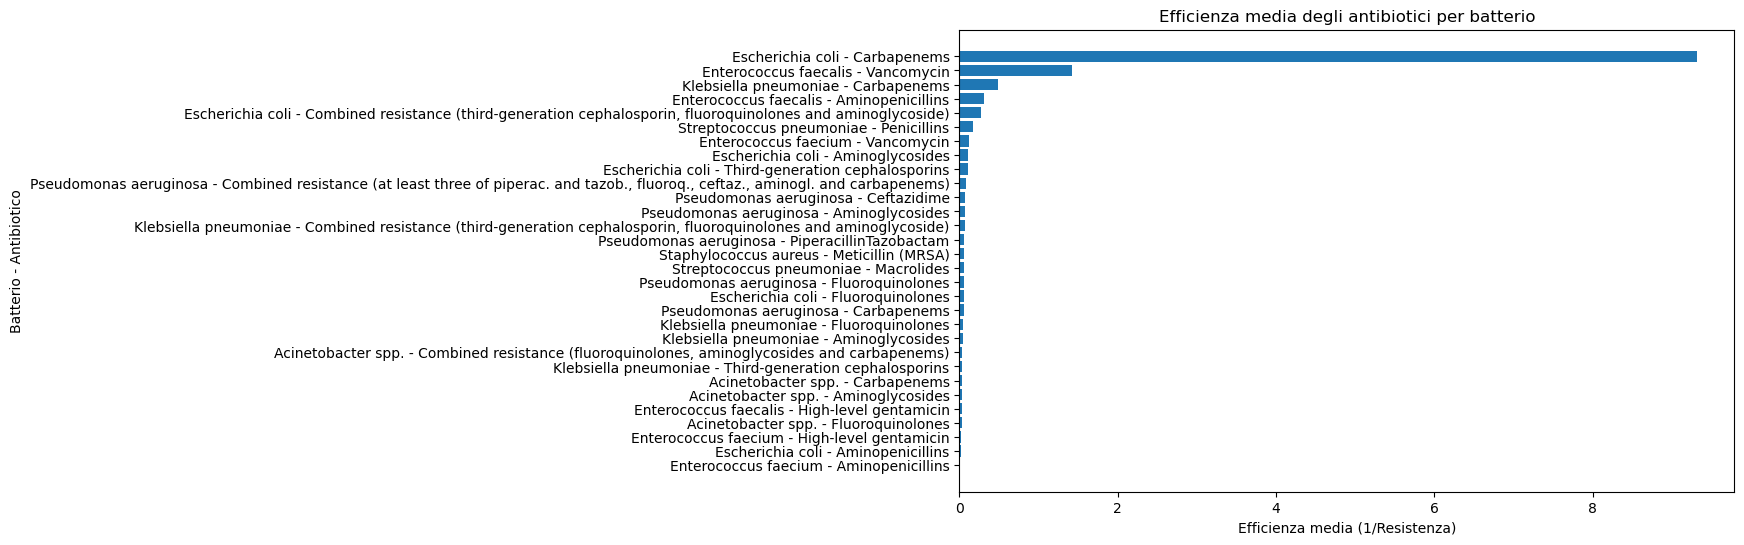

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Raggruppa per 'Bacteria' e 'Antibiotic' e calcola la media di 'Value'
grouped = data.groupby(['Bacteria', 'Antibiotic'])['Value'].mean().reset_index()

# Trasforma le resistenze del 0% in un valore molto piccolo per evitare la divisione per zero
grouped['Value'] = grouped['Value'].replace(0, 0.0001)

# Calcola l'inverso della resistenza
grouped['Efficiency'] = 1 / grouped['Value']

# Ordina i risultati in ordine decrescente di 'Efficiency'
grouped = grouped.sort_values('Efficiency', ascending=False)

# Visualizza i risultati con un grafico a barre orizzontale
plt.figure(figsize=(10, 6))
plt.barh(grouped['Bacteria'] + ' - ' + grouped['Antibiotic'], grouped['Efficiency'])
plt.xlabel('Efficienza media (1/Resistenza)')
plt.ylabel('Batterio - Antibiotico')
plt.title('Efficienza media degli antibiotici per batterio')
plt.gca().invert_yaxis()  # Inverti l'asse y
plt.show()



### Resistenza complessiva ai diversi antibiotici

In [25]:
# Describe: fornisce un riepilogo statistico del DataFrame
print("Describe:")
print(data.describe())

Describe:
              Value
count  64386.000000
mean      17.850871
std       23.939143
min        0.000000
25%        0.000000
50%        7.692308
75%       25.000000
max      100.000000


### Resistenza per ogni coppia di batterio-antibiotico

In [34]:
resistance_grouped = data.groupby(['Bacteria', 'Antibiotic'])['Value'].agg(['mean','min', 'max', 'median']).reset_index()
resistance_grouped

#min e max sono sempre min = 0 e max = 100
#ad esclusione della coppia Escherichia coli- Aminopenicillins, per i quali il valore minimo di resistenza è 5.882353 e il valore massimo è	90.000000
#mean e mediana 

,Bacteria,Antibiotic,mean,min,max,median
0,Acinetobacter spp.,Aminoglycosides,29.875082,0.000000,100.000000,11.620395
1,Acinetobacter spp.,Carbapenems,29.343503,0.000000,100.000000,8.108108
2,Acinetobacter spp.,"Combined resistance (fluoroquinolones, aminogl...",24.943081,0.000000,100.000000,6.250000
3,Acinetobacter spp.,Fluoroquinolones,34.235005,0.000000,100.000000,15.789474
4,Enterococcus faecalis,Aminopenicillins,3.150801,0.000000,100.000000,0.277778
5,Enterococcus faecalis,High-level gentamicin,30.555649,0.000000,100.000000,31.034483
6,Enterococcus faecalis,Vancomycin,0.703540,0.000000,100.000000,0.000000
7,Enterococcus faecium,Aminopenicillins,82.265742,0.000000,100.000000,88.388348
8,Enterococcus faecium,High-level gentamicin,44.819155,0.000000,100.000000,45.918367
9,Enterococcus faecium,Vancomycin,8.177164,0.000000,100.000000,1.017380


### Media e mediana 

Quando la media e la mediana sono simili, ciò suggerisce generalmente che i dati sono simmetricamente distribuiti intorno al centro. In altre parole, la metà dei dati è inferiore alla mediana (che è anche la media in questo caso) e l'altra metà è superiore. In questa situazione, la media fornisce un buon indicatore del valore "tipico" nei dati, poiché non è eccessivamente influenzata da valori estremamente alti o bassi (outlier).

Quando la media e la mediana sono molto differenti, è probabile che i dati siano asimmetricamente distribuiti. Questo potrebbe suggerire la presenza di valori anomali o estremi che stanno influenzando la media. In questi casi, la mediana può essere un indicatore più affidabile del valore "tipico", poiché è resistente agli outlier. Ad esempio, se la media è molto superiore alla mediana, potrebbe indicare che ci sono alcuni valori molto alti nei dati che stanno alzando la media.

### Considerazioni: 
Nel dataset vediamo per esempio che per "Enterococcus faecium" e "Aminopenicillins" la media e la mediana sono molto vicine (82.26 e 88.39 rispettivamente), indicando una distribuzione probabilmente simmetrica dei dati. Al contrario, per "Acinetobacter spp." e "Aminoglycosides" la media è 29.87 mentre la mediana è solo 11.62, suggerendo una distribuzione asimmetrica con la presenza di valori alti che aumentano la media.

In [33]:
resistance_grouped_sorted = resistance_grouped.sort_values(by='mean', ascending=False)

resistance_grouped_sorted

,Bacteria,Antibiotic,mean,min,max,median
7,Enterococcus faecium,Aminopenicillins,82.265742,0.000000,100.000000,88.388348
11,Escherichia coli,Aminopenicillins,53.092757,5.882353,90.000000,53.208311
8,Enterococcus faecium,High-level gentamicin,44.819155,0.000000,100.000000,45.918367
3,Acinetobacter spp.,Fluoroquinolones,34.235005,0.000000,100.000000,15.789474
5,Enterococcus faecalis,High-level gentamicin,30.555649,0.000000,100.000000,31.034483
0,Acinetobacter spp.,Aminoglycosides,29.875082,0.000000,100.000000,11.620395
1,Acinetobacter spp.,Carbapenems,29.343503,0.000000,100.000000,8.108108
20,Klebsiella pneumoniae,Third-generation cephalosporins,27.605112,0.000000,100.000000,20.754717
2,Acinetobacter spp.,"Combined resistance (fluoroquinolones, aminogl...",24.943081,0.000000,100.000000,6.250000
16,Klebsiella pneumoniae,Aminoglycosides,22.906352,0.000000,100.000000,15.384615


### Osservazioni sul comportamento della resistenza

Da questo campione possiamo dedurre che alcuni ceppi di batteri, come "Enterococcus faecium" rispetto agli aminopenicilline, hanno livelli di resistenza molto elevati (in media 82.26%, con una mediana del 88.38%). Ciò indica che l'efficacia delle aminopenicilline contro Enterococcus faecium è generalmente bassa.
Altri ceppi, come "Escherichia coli" rispetto ai carbapenemi, mostrano livelli di resistenza molto bassi (in media 0.11%, con una mediana di 0%). Questo indica che i carbapenemi sono generalmente molto efficaci contro Escherichia coli.
La resistenza varia non solo tra i diversi ceppi di batteri, ma anche tra i diversi antibiotici. Ad esempio, "Acinetobacter spp." ha un livello di resistenza medio più alto alle fluoroquinoloni (34.24%) rispetto ai carbapenemi (29.34%).

## ANALISI GRAFICA


Histogram (histplot): Potresti utilizzare un istogramma per visualizzare la distribuzione dei valori di resistenza agli antibiotici ('Value'). Questo ti permetterebbe di vedere in che modo i valori si distribuiscono lungo il range di percentuali.


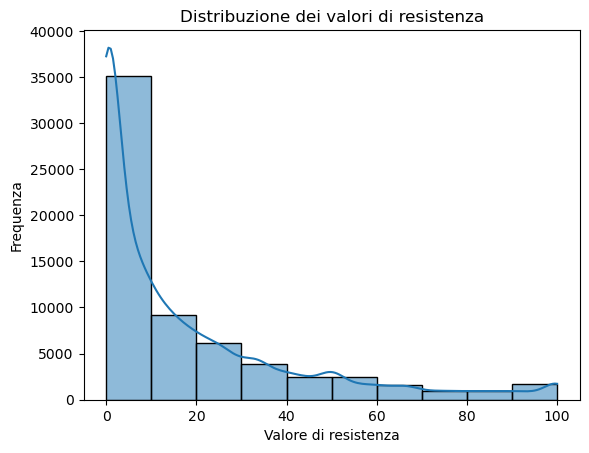

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea l'istogramma
sns.histplot(data['Value'], bins=10, kde=True)

# Personalizza l'istogramma
plt.title('Distribuzione dei valori di resistenza')
plt.xlabel('Valore di resistenza')
plt.ylabel('Frequenza')

# Mostra l'istogramma
plt.show()


Box Plot (boxplot): Un box plot potrebbe essere utilizzato per confrontare la distribuzione dei valori di resistenza tra diverse categorie di batteri ('Bacteria') o tra diversi gruppi di antibiotici ('Antibiotic'). Potrebbe anche essere interessante confrontare le distribuzioni per differenti anni ('Time') o regioni ('RegionName').

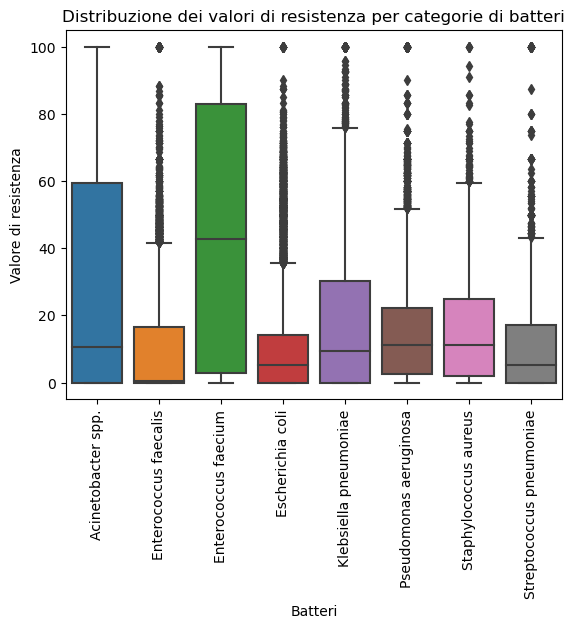

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un box plot per la distribuzione dei valori di resistenza tra diverse categorie di batteri
sns.boxplot(x='Bacteria', y='Value', data=data)
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x, se necessario
plt.title('Distribuzione dei valori di resistenza per categorie di batteri')
plt.xlabel('Batteri')
plt.ylabel('Valore di resistenza')

# Mostra il box plot
plt.show()


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che il tuo DataFrame si chiami df

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value', data=df)

plt.title('Distribuzione dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Valore')
plt.show()


NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

Bar Plot (barplot): Un bar plot potrebbe essere utile per confrontare la resistenza media (o mediana, o altro indice di centralità) tra diverse categorie di batteri o gruppi di antibiotici. Potresti anche usare un bar plot per visualizzare il numero di rapporti per anno, per regione, ecc.

Confronto tra categorie di batteri o gruppi di antibiotici:

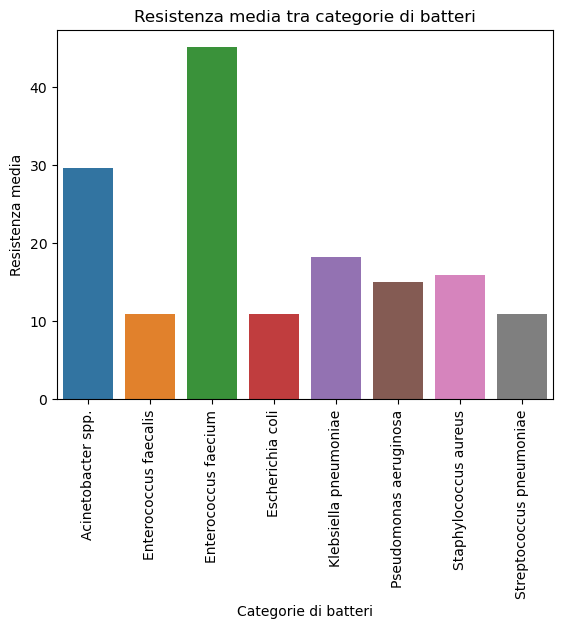

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la resistenza media per ogni categoria di batteri o gruppo di antibiotici
resistance_mean = data.groupby('Bacteria')['Value'].mean()  # Sostituisci 'Bacteria' con 'Antibiotic' se necessario

# Crea un bar plot per la resistenza media
sns.barplot(x=resistance_mean.index, y=resistance_mean.values)
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x, se necessario
plt.title('Resistenza media tra categorie di batteri')  # Sostituisci con 'Resistenza media tra gruppi di antibiotici' se necessario
plt.xlabel('Categorie di batteri')  # Sostituisci con 'Gruppi di antibiotici' se necessario
plt.ylabel('Resistenza media')

# Mostra il bar plot
plt.show()


Visualizzazione del numero di rapporti per anno, regione, ecc.:

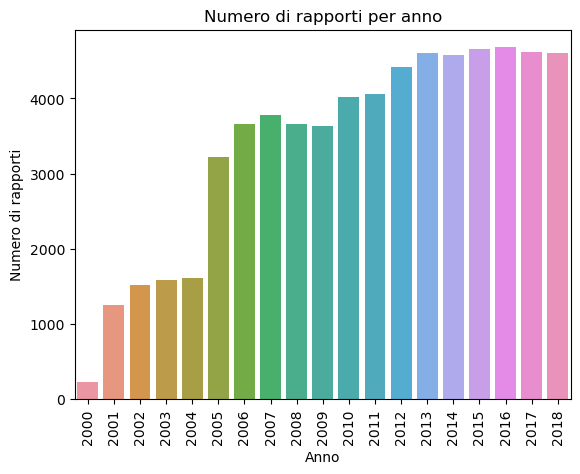

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conta il numero di rapporti per ogni anno, regione, ecc.
reports_count = data['Time'].value_counts()  # Sostituisci 'Time' con 'RegionName' o qualsiasi altra colonna di interesse

# Crea un bar plot per il numero di rapporti
sns.barplot(x=reports_count.index, y=reports_count.values)
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x, se necessario
plt.title('Numero di rapporti per anno')  # Sostituisci con 'Numero di rapporti per regione' o altro titolo rilevante
plt.xlabel('Anno')  # Sostituisci con 'Regione' o altro asse x rilevante
plt.ylabel('Numero di rapporti')

# Mostra il bar plot
plt.show()


Relational Plot (relplot): Questo è un tipo di plot multiplo che può creare una griglia di sotto-grafici per esplorare la relazione tra tre variabili. Potrebbe essere utile, ad esempio, per confrontare le tendenze nei valori di resistenza nel tempo per diversi gruppi di antibiotici o categorie di batteri. Un'altra possibilità potrebbe essere quella di confrontare le tendenze in diverse regioni.

Confronto delle tendenze nel tempo per diversi gruppi di antibiotici:

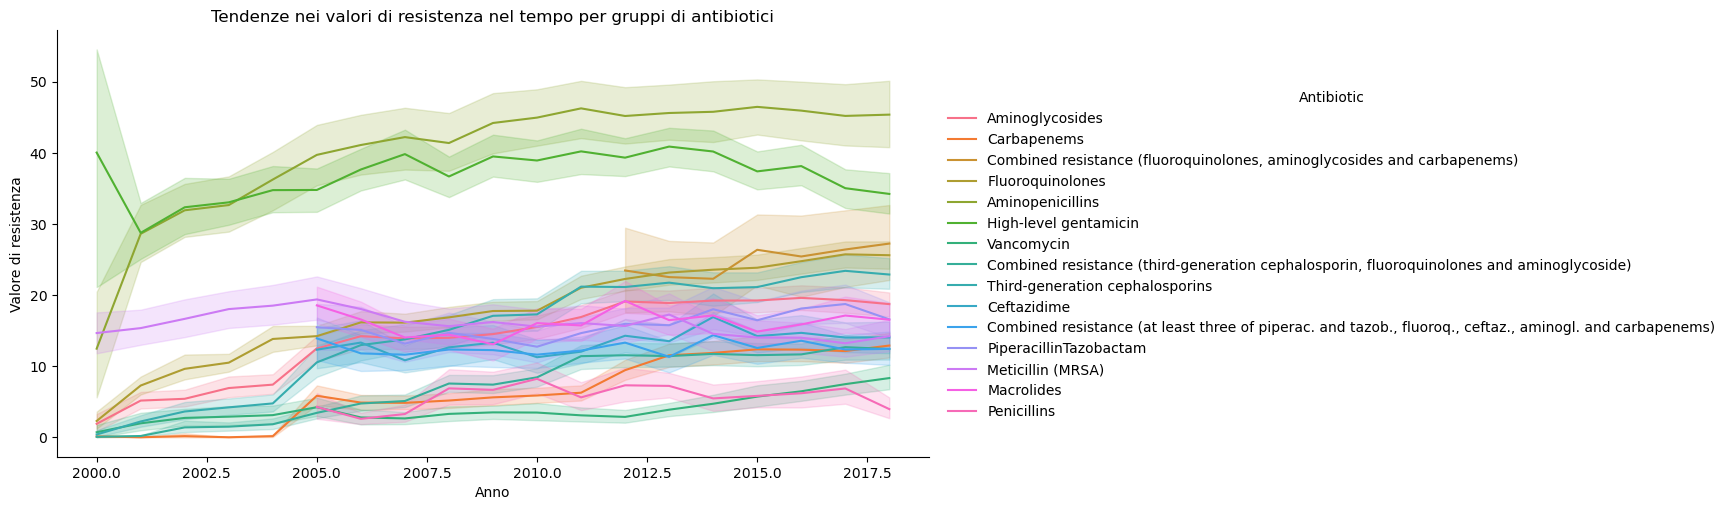

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un relplot per confrontare le tendenze nel tempo per diversi gruppi di antibiotici
sns.relplot(x='Time', y='Value', hue='Antibiotic', data=data, kind='line', aspect=2)
plt.title('Tendenze nei valori di resistenza nel tempo per gruppi di antibiotici')
plt.xlabel('Anno')
plt.ylabel('Valore di resistenza')

# Mostra il relplot
plt.show()


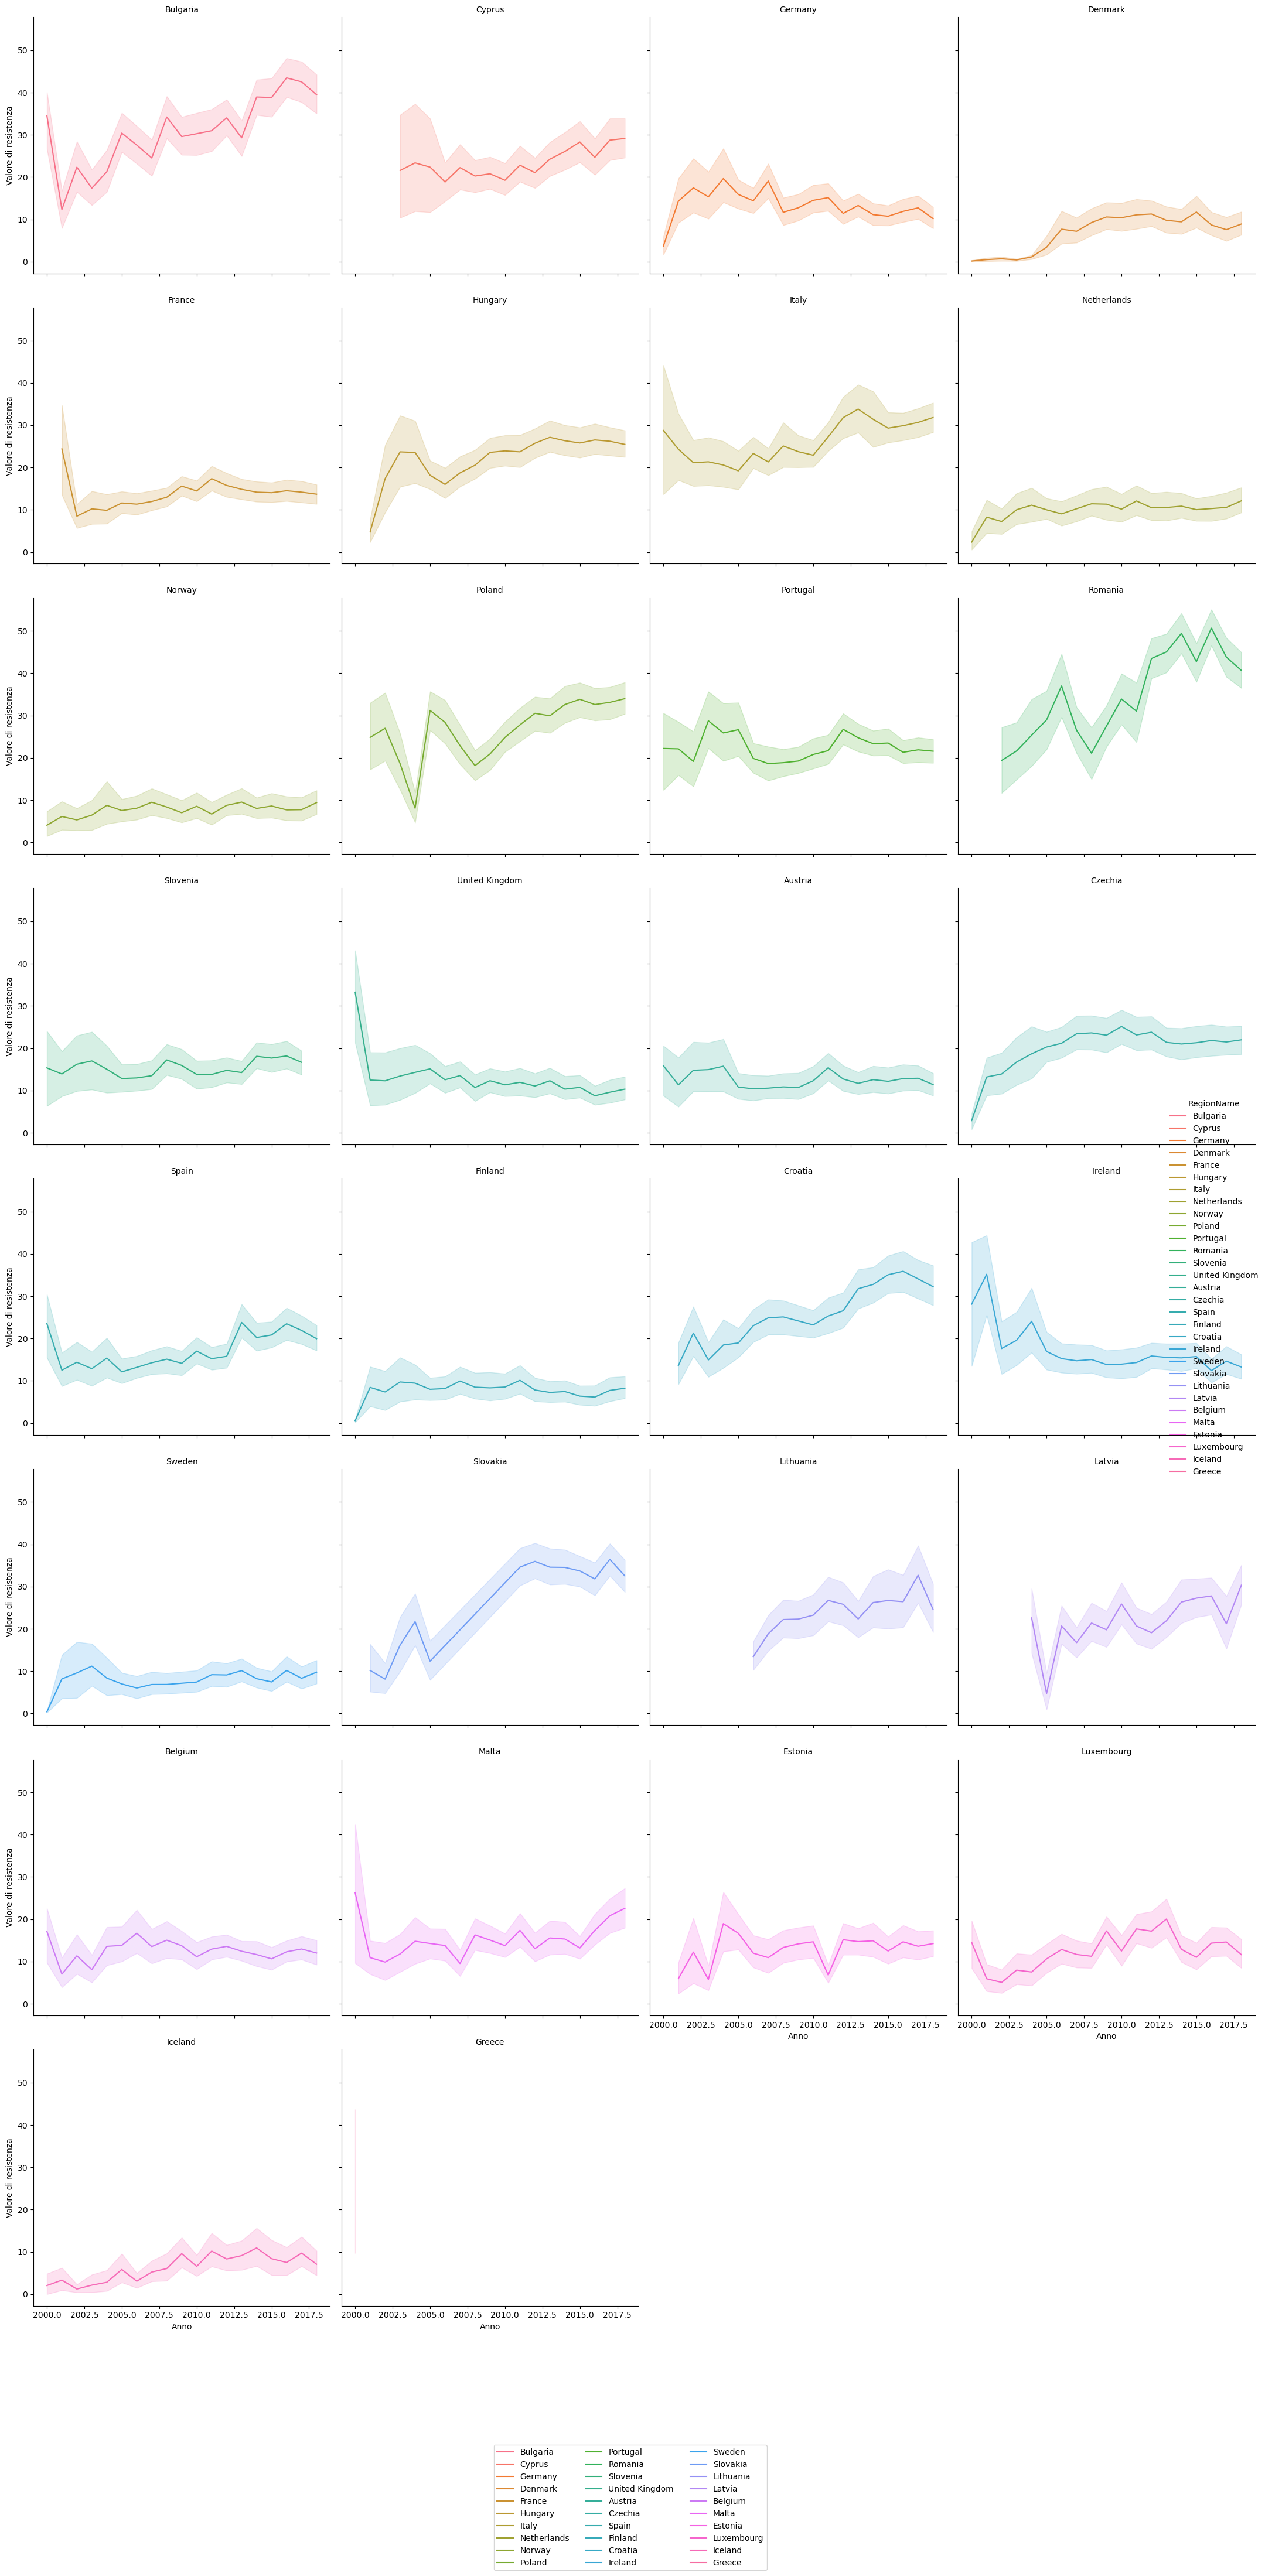

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un grafico faccetta per confrontare le tendenze in diverse regioni
g = sns.relplot(x='Time', y='Value', hue='RegionName', col='RegionName', col_wrap=4, kind='line', data=data)
g.set_titles('{col_name}')
g.set_axis_labels('Anno', 'Valore di resistenza')
plt.tight_layout()

# Sposta la legenda nella parte inferiore del riquadro
g.fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)  # Posiziona la legenda nella parte inferiore del riquadro

# Mostra i grafici faccetta con la legenda in basso
plt.show()



Confronto delle tendenze in diverse regioni:

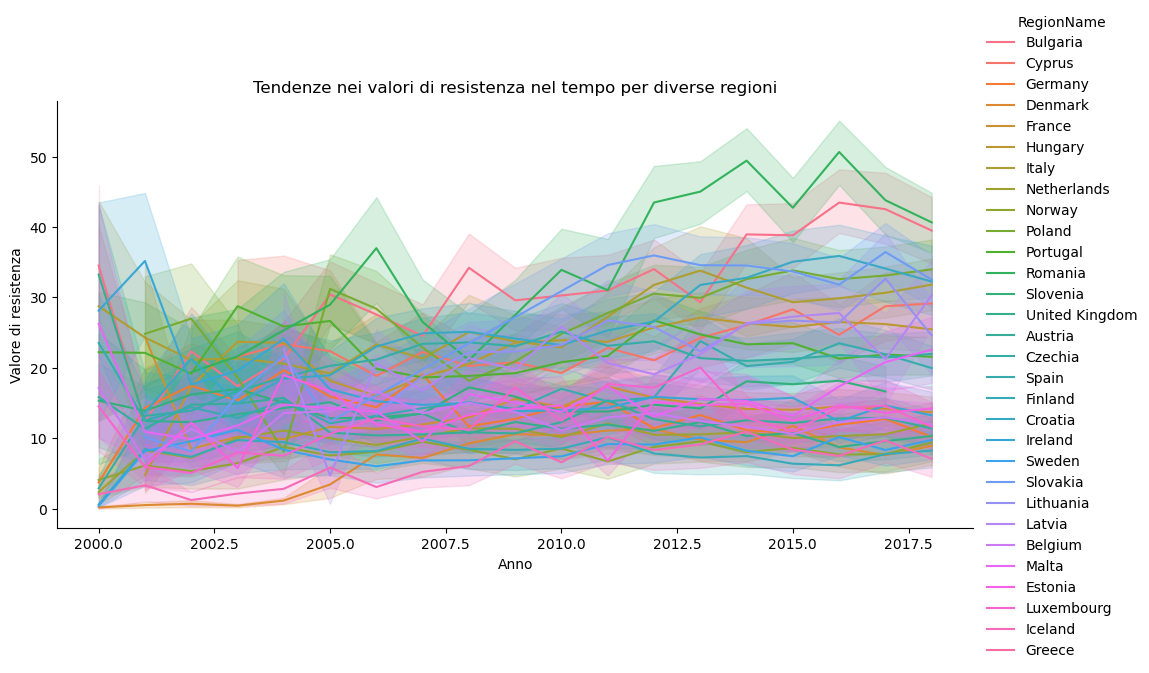

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un relplot per confrontare le tendenze in diverse regioni
sns.relplot(x='Time', y='Value', hue='RegionName', data=data, kind='line', aspect=2)
plt.title('Tendenze nei valori di resistenza nel tempo per diverse regioni')
plt.xlabel('Anno')
plt.ylabel('Valore di resistenza')

# Mostra il relplot
plt.show()

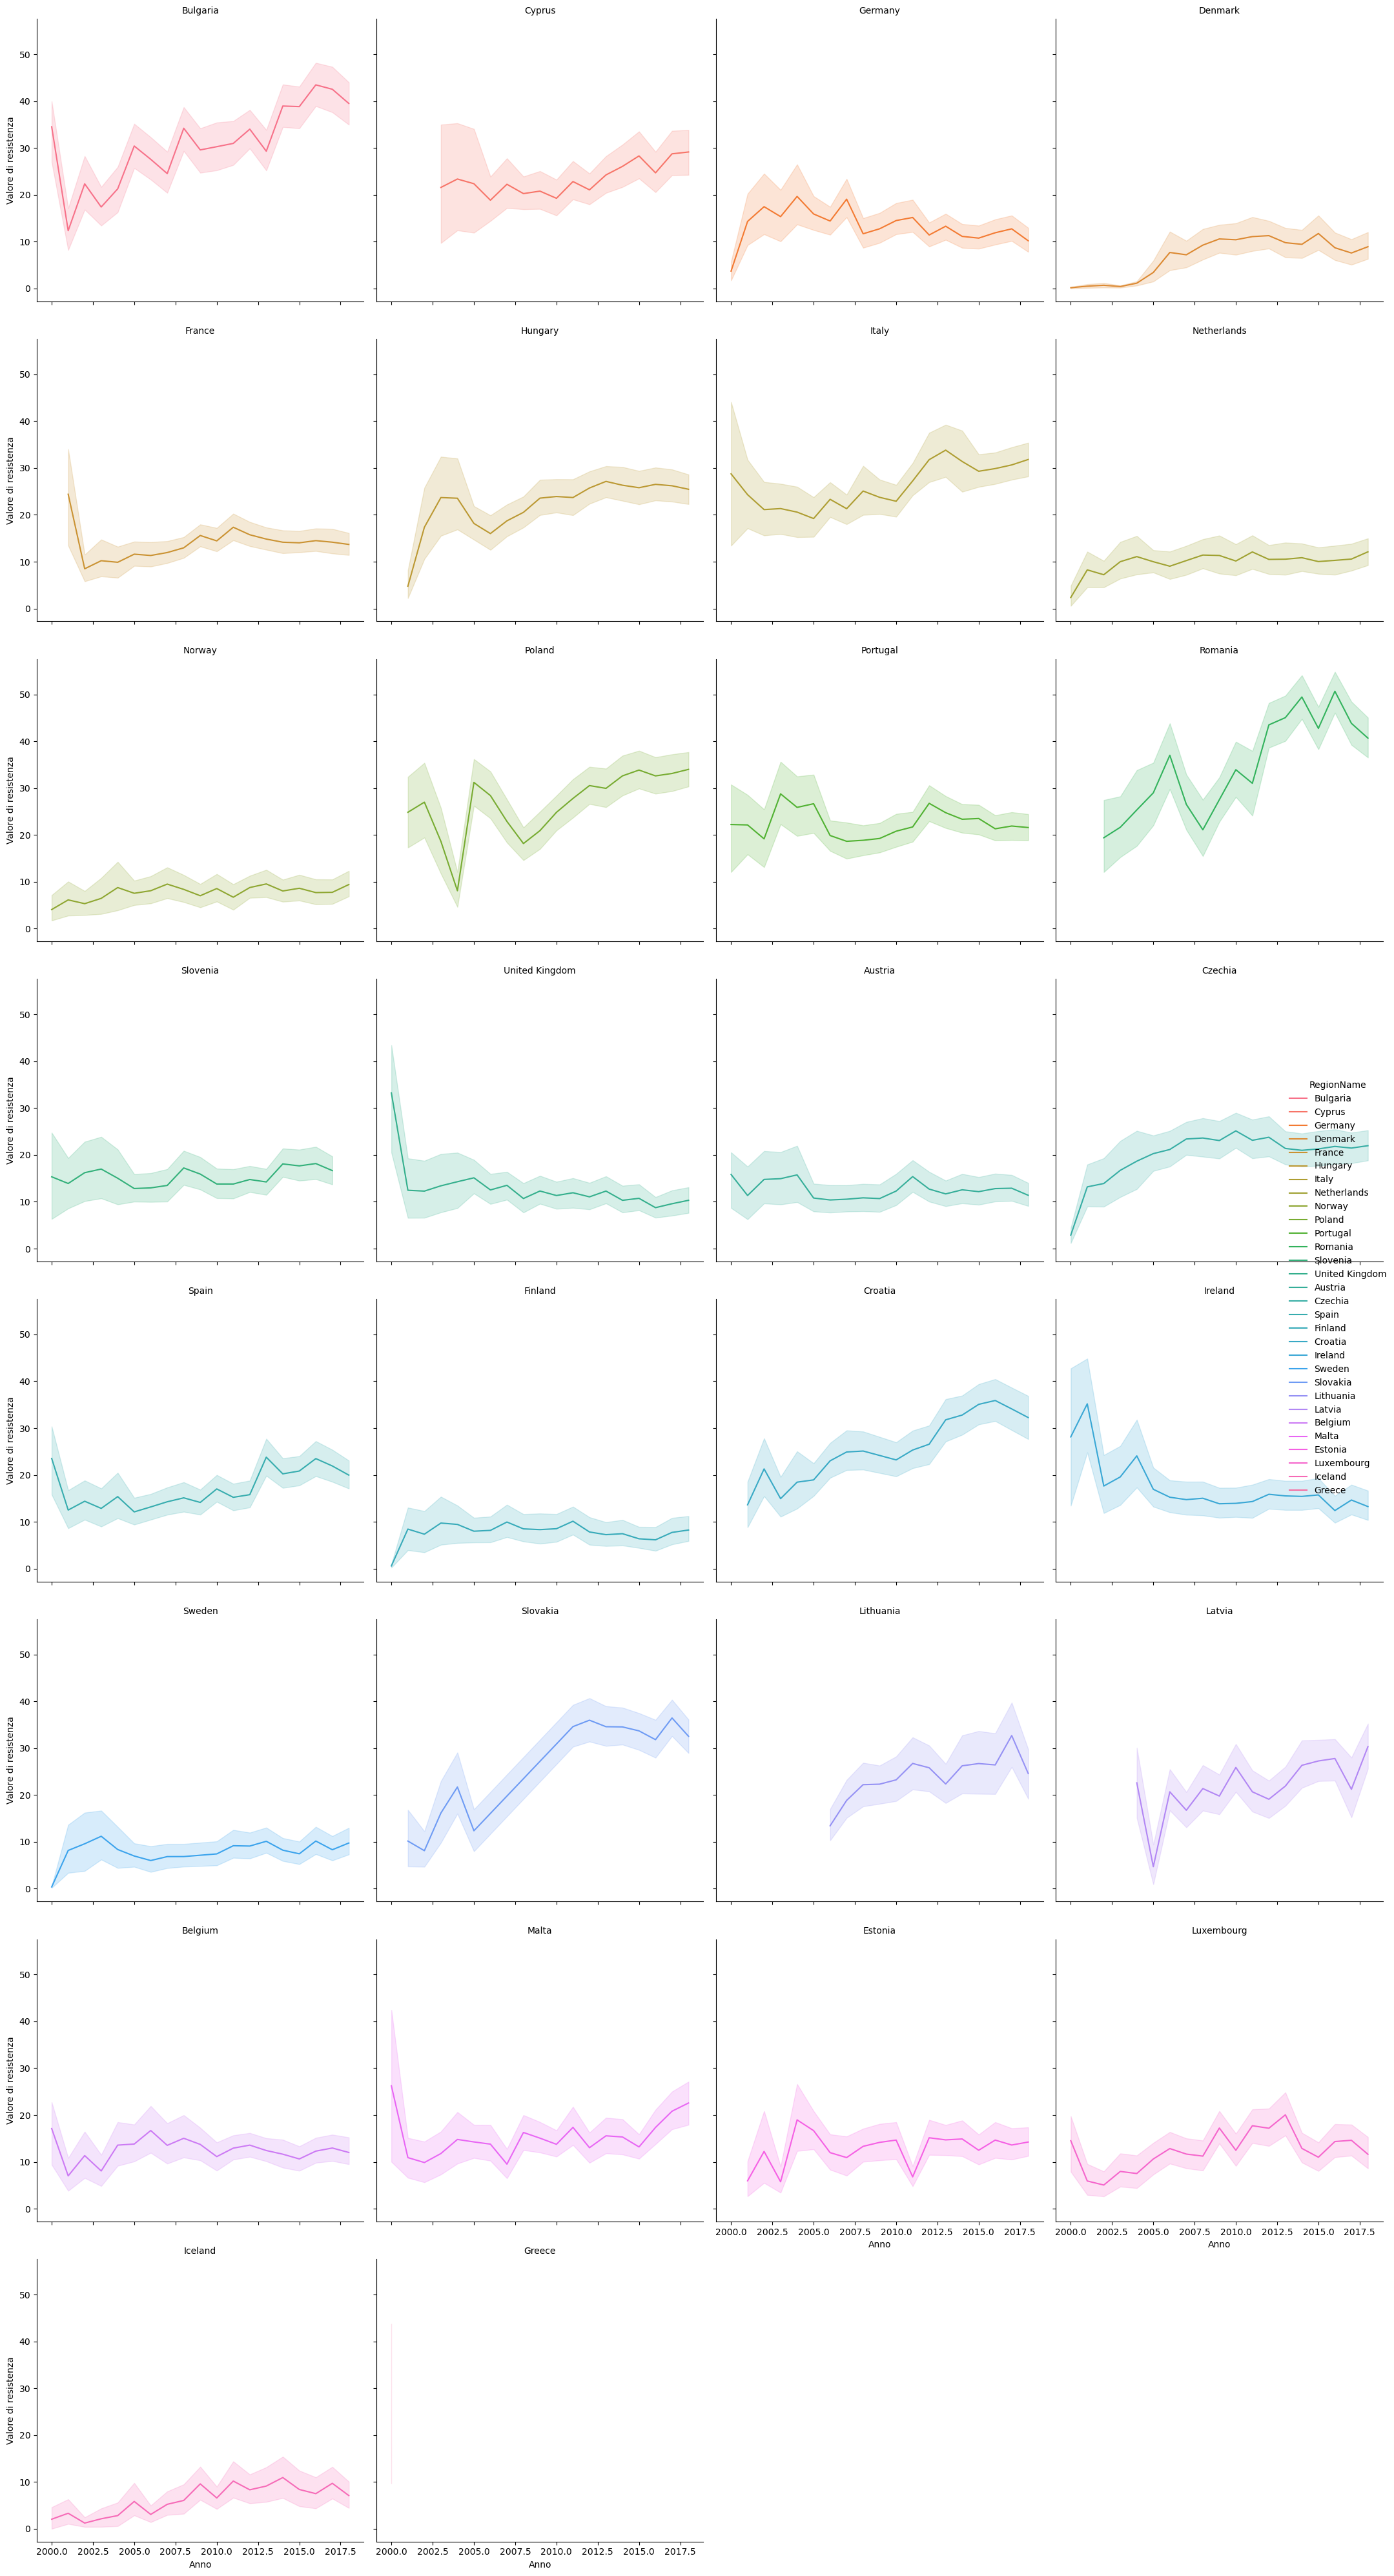

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un grafico faccetta per confrontare le tendenze in diverse regioni
g = sns.relplot(x='Time', y='Value', hue='RegionName', col='RegionName', col_wrap=4, kind='line', data=data)
g.set_titles('{col_name}')
g.set_axis_labels('Anno', 'Valore di resistenza')
plt.tight_layout()

# Mostra i grafici faccetta
plt.show()


Heatmap: Puoi utilizzare un Heatmap per visualizzare la correlazione tra le variabili numeriche nel tuo dataframe. Ad esempio, potresti essere interessato a conoscere la correlazione tra 'Value' (percentuale di resistenza) e altre variabili come 'Time' (anno). Puoi creare un Heatmap utilizzando la libreria seaborn in questo modo:

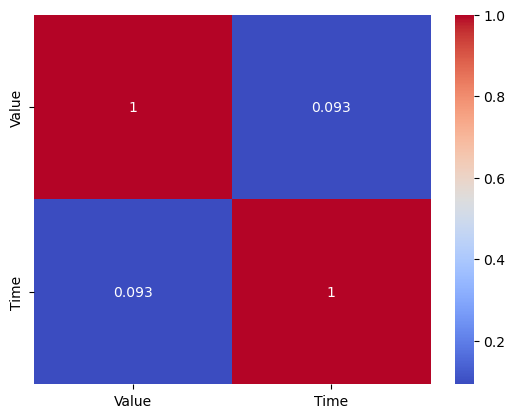

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona le colonne numeriche di interesse
numeric_columns = ['Value', 'Time']

# Crea una matrice di correlazione tra le colonne numeriche
correlation_matrix = data[numeric_columns].corr()

# Crea il Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostra il plot
plt.show()


Pair Plot: Un Pair Plot può essere utile per esplorare le relazioni tra le variabili numeriche nel tuo dataframe. Puoi utilizzarlo per visualizzare i diagrammi di dispersione tra coppie di variabili e le distribuzioni marginali delle singole variabili. Puoi creare un Pair Plot utilizzando seaborn in questo modo:

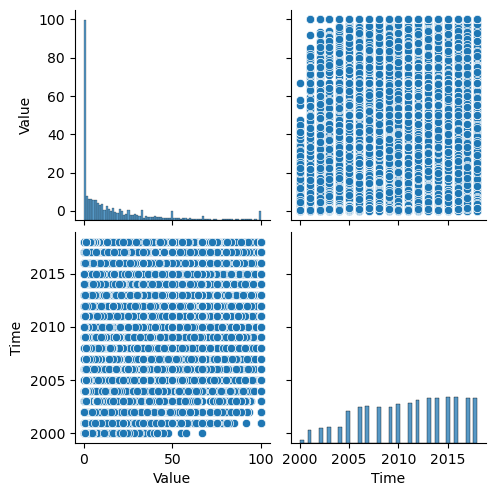

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona le colonne numeriche di interesse
numeric_columns = ['Value', 'Time']

# Crea il Pair Plot
sns.pairplot(data[numeric_columns])

# Mostra il plot
plt.show()


# Antimicrobial resistance data
https://www.kaggle.com/datasets/amritpal333/antimicrobial-resistance-data
Dati che mostrano l'insorgenza e la diffusione della resistenza antimicrobica (antibiotica) in Europa dal 1998.

I dati vengono raccolti sulla resistenza ai principali gruppi antimicrobici di sette microrganismi di grande importanza per la salute pubblica: Escherichia coli, Klebsiella pneumoniae, Pseudomonas aeruginosa, specie di Acinetobacter, Streptococcus pneumoniae, Staphylococcus aureus ed Enterococchi.

Anni: 2013, 2014, 2015

Copertura geografica
Tutti e 28 gli Stati membri dell'UE e due dei restanti tre paesi SEE (Islanda e Norvegia)
Romania, Slovacchia, Slovenia, Svezia, Malta, Paesi Bassi, Polonia, Portogallo, Belgio, Austria, Cipro, Bulgaria, Germania, Repubblica Ceca, Spagna, Danimarca, Finlandia, Estonia, Regno Unito, Francia, Croazia, Grecia, Irlanda, Ungheria, Lituania, Italia, Lettonia, Lussemburgo

Fonte: Centro europeo per la prevenzione e il controllo delle malattie

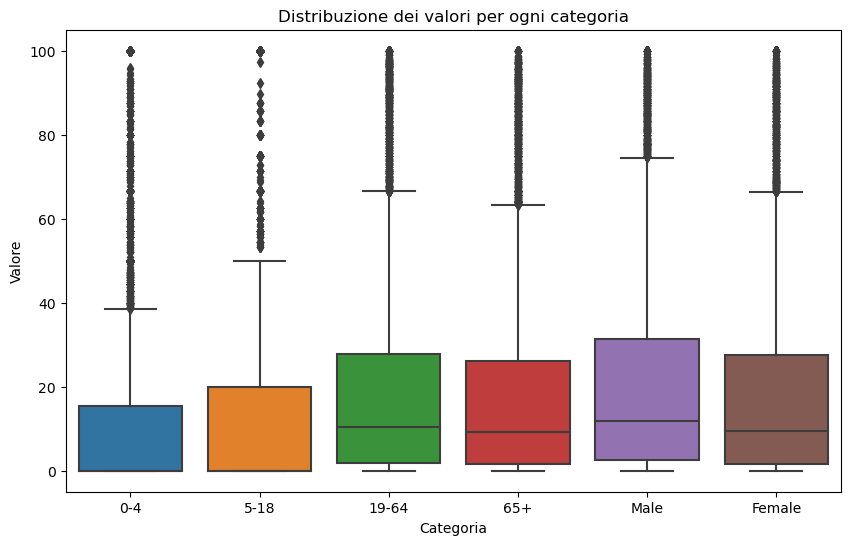

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che il tuo DataFrame si chiami df

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value', data=data)

plt.title('Distribuzione dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Valore')
plt.show()


Questo codice crea un box plot per ogni categoria ('0-4', '5-18', '19-64', '65+'), mostrando la distribuzione dei 'Value' per ciascuna categoria. Ogni box plot mostra la mediana (la linea nera all'interno della scatola), i quartili (le estremità della scatola), e gli outlier (i punti al di fuori delle "antenne").

C:\Users\afron\AppData\Local\Temp\ipykernel_3672\4205905821.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Value', data=data, ci=None)


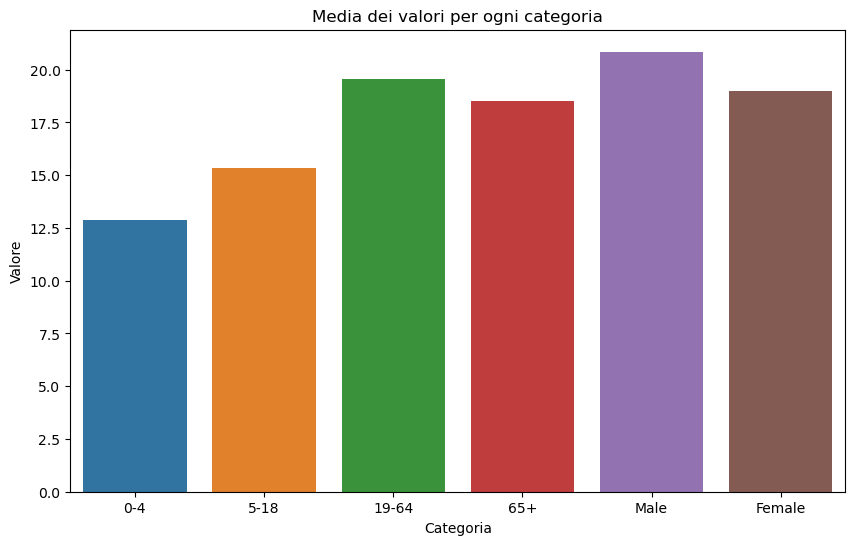

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Value', data=data, ci=None)

plt.title('Media dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Valore')
plt.show()


Questo codice crea un grafico a barre con l'asse x rappresentante la 'Category' e l'asse y rappresentante la media dei 'Value' per ciascuna categoria. Il parametro ci=None rimuove le barre di errore (che rappresentano l'intervallo di confidenza).

In [21]:
# Esegui un'operazione groupby sulla base della 'Category' e calcola la media dei 'Value'
grouped = data.groupby('Category')['Value'].mean()

print(grouped)


Category
0-4       12.885277
19-64     19.550569
5-18      15.338244
65+       18.495545
Female    18.965033
Male      20.849856
Name: Value, dtype: float64


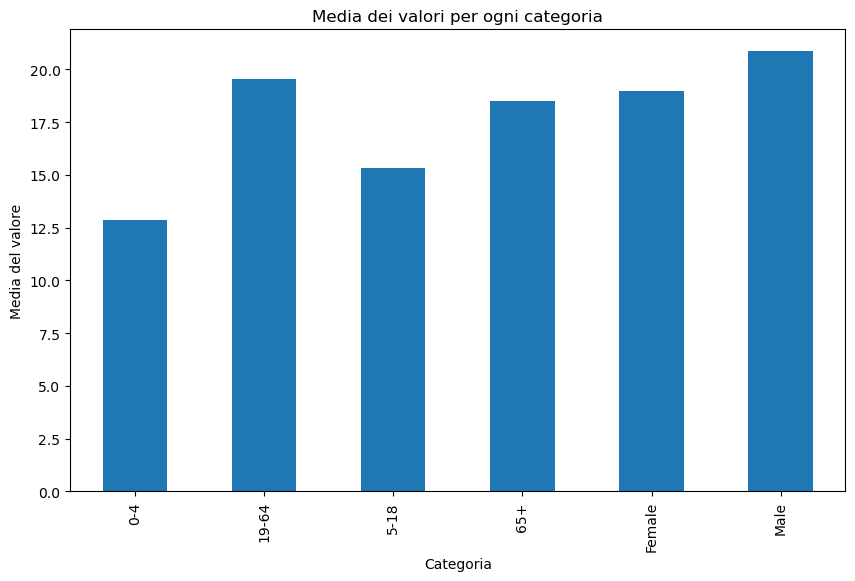

In [22]:
grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Media dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Media del valore')
plt.show()


Questo codice crea un grafico a barre con l'asse x rappresentante la 'Category' e l'asse y rappresentante la media dei 'Value' per ciascuna categoria. Ogni barra rappresenta una categoria e l'altezza della barra rappresenta la media dei 'Value' per quella categoria.

Per determinare le correlazioni tra le colonne del tuo DataFrame, puoi utilizzare il metodo .corr() di pandas. Tuttavia, il metodo .corr() funziona solo su colonne numeriche.

Nel tuo DataFrame, le colonne numeriche sono Unnamed: 0, Time e Value. Puoi quindi utilizzare il metodo .corr() su queste colonne nel seguente modo:

In [23]:
# Calcola la correlazione tra le colonne numeriche
correlation = data[['Unnamed: 0', 'Time', 'Value']].corr()

print(correlation)


            Unnamed: 0      Time     Value
Unnamed: 0    1.000000  0.039306 -0.156147
Time          0.039306  1.000000  0.092703
Value        -0.156147  0.092703  1.000000


Questo codice restituirà un DataFrame che mostra le correlazioni tra le colonne Unnamed: 0, Time e Value.

Ricorda che il coefficiente di correlazione varia tra -1 e 1. Un valore vicino a 1 implica una forte correlazione positiva, un valore vicino a -1 una forte correlazione negativa, e un valore vicino a 0 nessuna correlazione.

Nel tuo caso specifico, tieni presente che il coefficiente di correlazione da solo potrebbe non essere sufficiente per trarre conclusioni definitive. Ad esempio, la colonna Unnamed: 0 sembra essere solo un indice ed è improbabile che abbia un significato utile. Potrebbe essere utile eseguire ulteriori analisi statistiche per comprendere meglio i tuoi dati.